# Generate appropriate datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#to load all datasets
data = []
for i in range(30):
    data.append(np.load('../Data/dataset_'+str(i)+'.npy'))
data=np.array(data)
np.shape(data)

(30, 1001, 40, 40)

In [21]:
# Calculates the energy of each state in the dataset
def energy(data):
    configuration = data
    gridsize = np.size(data,1)
    energy = np.zeros(np.size(data,0))
    for i in range(gridsize):
        for j in range(gridsize):
            spin = configuration[:,i,j]
            nearest_neighbors = configuration[:,(i+1)%gridsize, j] + configuration[:,i,(j+1)%gridsize] + configuration[:,(i-1)%gridsize, j] + configuration[:,i,(j-1)%gridsize]
            energy += -nearest_neighbors*spin
    return energy/2.

# Calculates the magnetization of each state in the dataset 
def magnetization(data):
    configuration = data
    magnetization = np.sum(np.sum(configuration,axis=2),axis=1)
    return magnetization

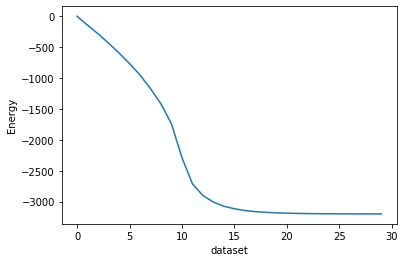

In [24]:
avg_energy = []
for i in range(0,30):
    avg_energy.append(np.average(energy(data[i])))
plt.plot(avg_energy)
plt.ylabel('Energy')
plt.xlabel('dataset')
plt.show()

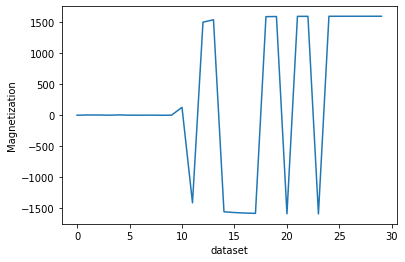

In [23]:
avg_mag = []
for i in range(0,30):
    avg_mag.append(np.average(magnetization(data[i])))
plt.plot(avg_mag)
plt.ylabel('Magnetization')
plt.xlabel('dataset')
plt.show()

Here we can clearely see that the critical temperature is reached at dataset 10. This means all datasets with the labels from 11 to 29 can be classified as being below the critical temperature, and all datasets with albels 0-10 can be classified as being the critical temperature or being above the critical temperature. More clearley this can be seen as the average magneitzation in dataset 10 is about 10 times less than that of dataset 11:

In [27]:
-np.average(magnetization(data[10]))/np.average(magnetization(data[9]))

80.6786171574904

Let's now create an appropriate dataset includ their lables (1 for $T > T_c$ and 0 for $T < T_c$). There are 1001 spin configurations in each dataset. This means as the first 9 datasets get label 0. For this our datavector needs to load all data except the 10th which is not classifiable

In [28]:
#to load all datasets except the 10th dataset
data = []
for i in range(30):
    if i != 10:
        data.append(np.load('../Data/dataset_'+str(i)+'.npy'))
data=np.array(data)
np.shape(data)

(29, 1001, 40, 40)

In [29]:
#Lenght of the lattice
L = 40
#Number of configurations per temp
N = 1001
#These are lists with exactly 1001 zeros and ones each, which can be matched with their datasets
zero_labels = np.zeros(N)
one_labels = zero_labels + 1


#Reshape the data to make it only two dimensional
shape=data.shape
data=data.reshape(shape[0]*shape[1],shape[2],shape[3])
np.shape(data)

(29029, 40, 40)

Now the data array is an array with 30030 spin configurations and 1600 spins per spin configuration. The first $10 * 1001$ configurations must be labled with 1 while the rest ($20*1001$) must be labled with 0. with that we can easely see that the labels must be an array where the first 10010 enbtries have to be a one and the next 20020 entries have to be a zero:

In [30]:
labels = np.zeros(N*9) + 1 
labels = np.append(labels,np.zeros(N*20))
np.shape(labels)

(29029,)

Let's check wether or not the validation data fits the spin configuration. For this I plot one configuration above and below $T_c$. We can see that the labels match

0.0

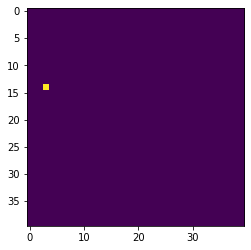

In [31]:
plt.imshow(data[20000])
labels[20000]

1.0

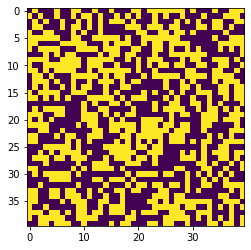

In [32]:
plt.imshow(data[1000])
labels[1000]

Lets split up the data into X_train, y_train, X_test and y_test and shuffle them randomly

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33,random_state=10)

Check again if the labels are still correct, which it seems they are

0.0

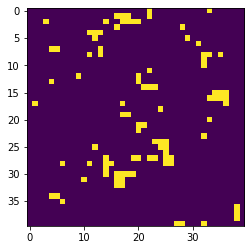

In [37]:
plt.imshow(X_train[17])
y_train[17]

1.0

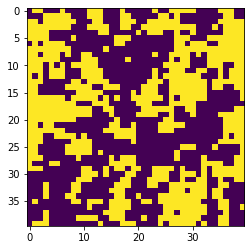

In [42]:
plt.imshow(X_train[25])
y_train[25]

Finnaly lets export these arrays:

In [16]:
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)